# Pandas

Задание 1. Создайте Series из последовательности 15 значений, равномерно разбивающих отрезок [0, 20] (воспользуйтесь функцией linspace) Определите отношение элементов полученной серии к их предыдущим элементам. В результате необходимо получить среднее полученного вектора, оставив в нём только те значения, которые не более чем 1.5. 
Варианты ответов:
1) 1.24 2) 1.18  3) 0.71 4) 1.13


In [3]:
import pandas as pd
import numpy as np

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
numb1 = pd.Series(data = np.linspace(0, 20, 15))
numb2 = numb1.divide(numb1.shift(1))
numb3 = numb2[numb2 <= 1.5].mean()
print(numb3)

1.181677812927813


Задание 2. Сгенерируйте Series из 100 значений нормально распределённой СВ (np.random.normal с дефолтными параметрами - нулевым средним и единичной дисперсией). Возведите каждое значение серии в 3 степень, а значения индекса увеличьте в 3 раза. Выведите сумму элементов, строго меньших 2.6, имеющих нечётные значения индекса. Выведите количество значений серии меньше нуля. np.random.seed(242)

In [7]:
np.random.seed(242)
pd.options.display.max_rows = 10
### Type your code here
s = pd.Series(np.random.normal(size=100)**3, index=[x * 3 for x in range(100)])
print(round(s[s < 2.6][lambda x: x.index % 2 ==1].sum(), 2), s[s < 0].count(), sep=',')

-15.15,51


Задание 3.
1.	Отобразите основную информацию об этом DataFrame и его данных.
2.	Верните первые 3 строки DataFrame df.
3.	Выберите только столбцы «animal» и «age» из DataFrame df.
4.	Выберите данные в строках [3, 4, 8] и в столбцах [‘animal’, ‘age'].
5.	Выберите только те строки, в которых количество посещений больше 3.
6.	Выберите строки, в которых отсутствует возраст, т. е. это NaN.
7.	Выберите строки, в которых животное — кошка, а возраст меньше 3 лет.
8.	Выберите строки с возрастом от 2 до 4 (включительно). 
9.	Измените возраст в строке «f» на 1,5.
10.	Подсчитайте сумму всех посещений в df (т.е. найдите общее количество посещений).
11.	Рассчитайте средний возраст для каждого отдельного животного в df.


In [9]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [10]:
# Отобразите основную информацию об этом DataFrame и его данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [11]:
# Верните первые 3 строки DataFrame df.
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [12]:
# Выберите только столбцы «animal» и «age» из DataFrame df.
df.loc[:, ['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [13]:
# Выберите данные в строках [3, 4, 8] и в столбцах [‘animal’, ‘age'].
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [14]:
# Выберите только те строки, в которых количество посещений больше 3.
df[df['visits'] > 3]

,animal,age,visits,priority


In [15]:
# Выберите строки, в которых отсутствует возраст, т. е. это NaN.
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [16]:
# Выберите строки, в которых животное — кошка, а возраст меньше 3 лет.
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [17]:
# Выберите строки с возрастом от 2 до 4 (включительно).
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [19]:
# Измените возраст в строке «f» на 1,5.
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [20]:
# Подсчитайте сумму всех посещений в df (т.е. найдите общее количество посещений).
df['visits'].sum()

19

In [21]:
# Рассчитайте средний возраст для каждого отдельного животного в df.
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

Задание 4.
12.	Добавьте новую строку «k» в df с выбранными вами значениями для каждого столбца. Затем удалите эту строку, чтобы вернуть исходный DataFrame.
13.	Подсчитайте количество животных каждого вида в df.
14.	Отсортируйте df сначала по значениям в столбце «возраст» в порядке убывания, затем по значению в столбце «посещения» в порядке возрастания (таким образом, строка i должна быть первой, а строка d — последней).
15.	Столбец «приоритет» содержит значения «да» и «нет». Замените этот столбец столбцом логических значений: «да» должно быть «Истина», а «нет» должно быть «Ложь».
16.	В столбце «животное» измените записи «змея» на «питон».


In [22]:
# Добавьте новую строку «k» в df с выбранными вами значениями для каждого столбца.
# Затем удалите эту строку, чтобы вернуть исходный DataFrame.
df.loc['k'] = [5.5, 'dog', 'no', 2]
df = df.drop('k')

In [23]:
# Подсчитайте количество животных каждого вида в df.
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [24]:
# Отсортируйте df сначала по значениям в столбце «возраст» в порядке убывания,
# затем по значению в столбце «посещения» в порядке возрастания (таким образом,
# строка i должна быть первой, а строка d — последней).
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [25]:
# Столбец «приоритет» содержит значения «да» и «нет». 
# Замените этот столбец столбцом логических значений: «да» должно быть «Истина», а «нет» должно быть «Ложь».
df['priority'] = df['priority'].map({'yes': True, 'no': False})

In [26]:
# В столбце «животное» измените записи «змея» на «питон».
df['animal'] = df['animal'].replace('snake', 'python')

Задание 5.
Воспроизвести шаги задачи https://www.kaggle.com/code/kektyc/titanic-solution-a-beginner-s-guide-russian

Задание 6. В tr_types выберите произвольные 100 строк с помощью метода sample (указав при этом random_seed равный 242)
В полученной на предыдущем этапе подвыборке найдите долю наблюдений (стобец tr_description), в которой содержится подстрока 'плата' (в любом регистре).


In [27]:
df = pd.read_csv("tr_types.csv", sep=';')
df = df.sample(100, random_state=42)
d = df.loc[df.tr_description.str.lower().str.contains('плата')].count()[0] / len(df)
print(f"{d:.2f}")

0.24


Задание 7. Для поля tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
Перечислите названия топ-5 транзакций по частоте встречаемости.


In [41]:
transactions = pd.read_csv("transactions.csv", nrows=1000000, sep=",")
tr_types=pd.read_csv("tr_types.csv", sep=";")
gender_train=pd.read_csv("gender_train.csv", sep=",")
tr_mcc_codes=pd.read_csv("tr_mcc_codes.csv", sep=";")

In [42]:
top_ten_transactions = transactions["tr_type"].value_counts().sort_values(ascending=False).head(5)
tr_types[tr_types["tr_type"].isin(top_ten_transactions.index)]

,tr_type,tr_description
59,7070,Перевод на карту (с карты) через Мобильный бан...
98,1010,Покупка. POS ТУ СБ РФ
99,1030,Оплата услуги. Банкоматы СБ РФ
101,1110,Покупка. POS ТУ Россия
106,2010,Выдача наличных в АТМ Сбербанк России


Задание 8. В датафрейме transactions задайте столбец customer_id в качестве индекса. Выделите клиента с максимальной суммой транзакции. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов.

In [35]:
max_ind = transactions[['amount']].idxmax()
counts = abs(transactions.loc[transactions['customer_id'] == int(transactions['customer_id'][max_ind].values), 'amount']).value_counts()
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
499994,71186181,410 17:22:32,5499,1010,-14845.50,10268176
499995,71186181,411 12:41:25,5814,1110,-3571.01,26021835
499996,71186181,411 18:40:49,6011,2010,-15721.41,51586
499997,71186181,411 19:08:23,5411,1010,-13877.96,696286


Задание 9. Найдите максимальную разницу между медианами по полю amount из таблицы transactions используя np.ptp:
•	Медиана суммы транзакций; 
•	Медиана суммы транзакций по тем строкам, которые ни в одном из своих столбцов не содержат пустые значения; 
•	Медиана суммы транзакций по строкам, отсортированным по полю amount в порядке возрастания, и из которых удалены дублирующиеся по столбцам [mcc_code, tr_type] строки, причём при удалении соответстующих дублей остаются только последние из дублирующихся строк (keep='last’)


In [36]:
# Task 1 
summ = transactions.groupby('customer_id').sum() 
summ_medians = summ["amount"].median()
print(f"{summ_medians:.2f}")

-8278169.38


In [37]:
# Task 2 
without_nan = transactions.dropna() 
summ_nan = without_nan.groupby('customer_id').sum() 
summ_nan_medians = summ_nan["amount"].median()
print(f"{summ_nan_medians:.2f}")

-4330125.64


In [38]:
# Task 3 
sorted__transactions = transactions.sort_values(by="amount") 
sorted = sorted__transactions.drop_duplicates(subset=["mcc_code", "tr_type"], keep="last") 
summ_sort = sorted.groupby('customer_id').sum() 
summ_sort_medians = summ_sort["amount"].median()
print(f"{summ_sort_medians:.2f}")

-808.53


In [39]:
# Main task
dif = np.ptp([summ_medians, summ_nan_medians, summ_sort_medians]) 
print(f"{dif:.2f}") 

8277360.85


Задание 10. Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender). Причём с customers_gender необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner. После получения результата таблицы gender, tr_types, tr_mcc_codes можно удалить. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).

In [44]:
df = transactions.merge(tr_mcc_codes).merge(tr_types).merge(gender_train, how='left')
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
499835,8424966,434 12:03:26,4829,2340,-44918.32,890744,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...
499836,81807105,214 11:05:44,4829,2340,-47274.06,654571,0.0,Денежные переводы,Списание с карты по операции “перевода с карты...
499837,8180711,19 11:31:46,4829,2340,-12352536.75,NaN,NaN,Денежные переводы,Списание с карты по операции “перевода с карты...
499838,95895478,405 11:03:12,4829,4061,-673.77,127180,NaN,Денежные переводы,Плата за перевод на карту (с карты) через POS ...


In [46]:
# Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
dfc=df.copy()
g = dfc.loc[dfc['amount']<0].groupby(['gender']).amount.mean()
g1=g[1]-g[0]
abs(g1.round(2))

35040.92

In [45]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(499840, 9)

In [47]:
negative_trasactions_grouped_by_gender = transactions[transactions["amount"] < 0].groupby("gender")["amount"].mean()
abs(negative_trasactions_grouped_by_gender[0] - negative_trasactions_grouped_by_gender[1])

35040.918362733115

Задание 11. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10.
Определите отношение максимальной дисперсии к минимальной.


In [48]:
dfc1=df.copy()
dfc1['mcc_code+tr_type'] = dfc1.mcc_code.map(str) + dfc1.tr_type.map(str)
dfc2 = dfc1[['mcc_code+tr_type', 'amount']][dfc1.amount < 0]
fltr = lambda group_df: len(group_df['amount']) >= 10
amount = (dfc1.groupby('mcc_code+tr_type').filter(fltr) 
            .groupby('mcc_code+tr_type').var()).amount  
np.rint( amount.max() / amount.min()).astype(int)

8027934

In [52]:
df["mcc_code+tr_type"] = df["mcc_code"].astype(str) + df["tr_type"].astype(str)
res = (df
       .query("amount < 0")
       .groupby("mcc_code+tr_type")
       ["amount"]
       .agg(lambda x: x.var()**2 if len(x)>=10 else np.nan).dropna())
ratio = round(res.max() / res.min())
ratio

28201757535984

In [53]:
df['mcc_code+tr_type'] = df.mcc_code.map(str) + df.tr_type.map(str)
df = df[['mcc_code+tr_type', 'amount']][df.amount < 0]
fltr = lambda group_df: len(group_df['amount']) >= 10
amount = (df.groupby('mcc_code+tr_type').filter(fltr) 
            .groupby('mcc_code+tr_type').var()).amount  
np.rint( amount.max() / amount.min()).astype(int)

5310533

In [54]:
df.query('amount < 0').groupby(['mcc_code+tr_type'])['amount'] \
                                  .agg(['count', 'var']) \
                                  .query('count >= 10')['var'] \
                                  .agg(lambda x: round(max(x) / min(x)))


5310533

In [56]:
df = transactions.merge(tr_mcc_codes).merge(tr_types).merge(gender_train, how='left')
df_cc=df.copy()
df_cc['tr_day'] = df_cc.tr_datetime.str.split(expand=True)[0]
qwe = df_cc[df_cc.groupby('tr_day')['mcc_code'].transform('nunique')>75]
tas = qwe.groupby(['gender','mcc_code', 'mcc_description']).amount.median().abs()
print(tas[0].nlargest()) ### женщины 0
print(tas[1].nlargest()) ### мужчины 1
qwe1 = qwe[qwe['mcc_description'].str.contains("Флористика")].groupby(['gender']).amount.median().abs() ### ДА
print(qwe1)
qwe2 = qwe[qwe['mcc_description'].str.contains("Ценные бумаги")].groupby(['gender']).amount.median().abs() ### НЕТ
print(qwe2)
qwe3 = qwe[qwe['mcc_description'].str.contains("коктейль-бары")].groupby(['gender']).amount.median().abs() ### ДА
print(qwe3)

mcc_code  mcc_description                                           
4722      Туристические агентства и организаторы экскурсий              245547.090
4511      Авиалинии, авиакомпании, нигде более не классифицированные    207432.780
5211      Лесо- и строительный материал                                 203906.690
3000      Авиалинии, авиакомпании                                        72116.360
4829      Денежные переводы                                              51656.065
Name: amount, dtype: float64
mcc_code  mcc_description                                                  
5732      Продажа электронного оборудования                                    406510.75
9399      Правительственные услуги, нигде ранее не классифицируемые            153774.26
5655      Спортивная одежда, одежда для верховой езды и езды на мотоцикле      119707.31
5944      Магазины по продаже часов, ювелирных изделий и изделий из серебра    110049.87
5399      Различные товары общего назначения           

Задание 13. Разбейте расходы на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low’. Оставшиеся неотрицательные траты отнесите к категории 'Income'. (воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low’, и заполните пустые значения новой категорией). Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":".После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
import matplotlib.pyplot as plt
import seaborn as sns 
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()
Выберите верные ответы на вопросы ниже.
1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.


In [64]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

amount_bucket  Very High      High    Middle       Low  Very Low    Income
tr_hour                                                                   
0               0.597791  0.648212  0.572006  0.581988  0.596785  0.851365
1               0.572414  0.632184  0.628319  0.618785  0.568323  0.986577
2               0.545894  0.467153  0.642336  0.484375  0.363844  0.989160
3               0.566456  0.480000  0.504808  0.448378  0.311558  0.983131
4               0.602709  0.546667  0.554217  0.567398  0.369830  0.978221
...                  ...       ...       ...       ...       ...       ...
19              0.588571  0.552452  0.535344  0.565344  0.544799  0.692563
20              0.607438  0.537080  0.562714  0.592543  0.545654  0.695470
21              0.654613  0.606993  0.560865  0.602664  0.530083  0.711579
22              0.620079  0.648107  0.633803  0.618117  0.453638  0.709974
23              0.562500  0.661538  0.636364  0.520492  0.347395  0.834262

[24 rows x 6 columns]


TypeError: Got both 'size' and 'fontsize', which are aliases of one another

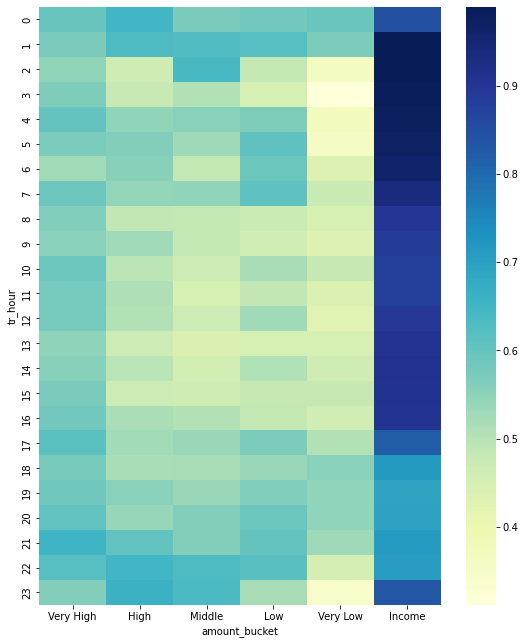

In [65]:
# Type your code here
%matplotlib inline
df = transactions.merge(tr_mcc_codes).merge(tr_types).merge(gender_train, how='left')
df_copy=df.copy()
df_copy['amount_bucket'] = pd.qcut(df_copy[df_copy.amount<0].amount,5,labels=['Very High','High','Middle','Low','Very Low'])
df_copy['amount_bucket'] = df_copy['amount_bucket'].cat.add_categories('Income').fillna('Income')
df_copy['tr_hour']=[int(s[1][:2]) for s in df['tr_datetime'].str.split(' ')]
dt_co = df_copy.pivot_table(index='tr_hour',columns='amount_bucket',values='gender')
print(dt_co)
print(plot_pivot_table(dt_co))
df_copy

In [62]:
""""
- 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. ### ДА
- 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам. ### НЕТ
- 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. ### ДА
- 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%) ### НЕТ
- 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. ### ДА
"""

'"\n- 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. ### ДА\n- 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам. ### НЕТ\n- 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. ### ДА\n- 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%) ### НЕТ\n- 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. ### ДА\n'

Задание 14. Измените тип поля tr_day на int.
Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.
Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
Выберите верные ответы на вопросы ниже.
-	1) 2 из полученных MCC-кодов связаны с финансовыми институтами 
-	2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) 
-	3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов 
-	4) Денежные переводы имеют как минимум 3 явных минимума средних 
-	5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 


In [66]:
# Type your code here
df_copy2=df.copy()
df_copy2['tr_day'] = df_copy2.tr_datetime.str.split(expand=True)[0].apply(int)
resul = df_copy2.groupby("mcc_code").filter(lambda x: len(x) > 60000)
resul1 = resul.groupby(['tr_day','mcc_code']).amount.mean().unstack()
resul1

mcc_code,5411,6010,6011
tr_day,,,
0,-17603.742741,47578.376861,-33496.294435
1,-19335.690242,53048.731504,-73367.590321
2,-14547.660991,108158.754124,-83939.153091
3,-11893.010313,96753.910629,-53769.490892
4,-12324.793047,131965.140913,-56723.951284
...,...,...,...
452,-11066.048793,140144.355533,-78591.385308
453,-14097.813000,191992.469294,-85425.695592
454,-15596.162974,125980.406716,-19620.684392


In [68]:
df_copy2=df.copy()
df_copy2['tr_day'] = df_copy2.tr_datetime.str.split(expand=True)[0].apply(int)
resul = df_copy2.groupby("mcc_code").filter(lambda x: len(x) > 60000)
resul1 = resul.groupby(['tr_day','mcc_code']).amount.mean().unstack()
resul1

mcc_code,5411,6010,6011
tr_day,,,
0,-17603.742741,47578.376861,-33496.294435
1,-19335.690242,53048.731504,-73367.590321
2,-14547.660991,108158.754124,-83939.153091
3,-11893.010313,96753.910629,-53769.490892
4,-12324.793047,131965.140913,-56723.951284
...,...,...,...
452,-11066.048793,140144.355533,-78591.385308
453,-14097.813000,191992.469294,-85425.695592
454,-15596.162974,125980.406716,-19620.684392


<AxesSubplot:xlabel='tr_day'>

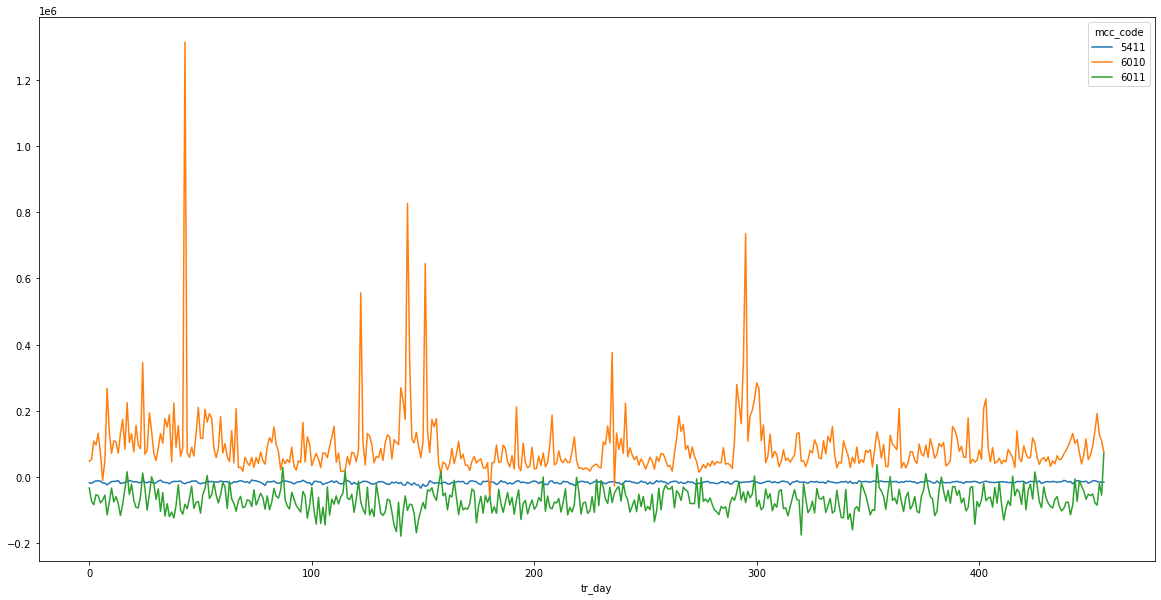

In [69]:
resul1.plot(figsize=(20, 10))

In [70]:
""""Вопросы:
- 1) 2 из полученных MCC-кодов связаны с финансовыми институтами ### ДА
- 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) ### ДА
- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов ### НЕТ
- 4) Денежные переводы имеют как минимум 3 явных минимума средних ### ДА
- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. ### НЕТ """ 

'"Вопросы:\n- 1) 2 из полученных MCC-кодов связаны с финансовыми институтами ### ДА\n- 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) ### ДА\n- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов ### НЕТ\n- 4) Денежные переводы имеют как минимум 3 явных минимума средних ### ДА\n- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. ### НЕТ '